In [1]:
from tqec.sketchup import ZXGraph, Position3D, NodeType, BlockGraph

## Logical CNOT

In [2]:
zx_graph = ZXGraph("Logical CNOT ZX Graph")
for position, node_type in [
    (Position3D(0, 0, 0), NodeType.Z),
    (Position3D(0, 0, 1), NodeType.X),
    (Position3D(0, 0, 2), NodeType.Z),
    (Position3D(0, 0, 3), NodeType.Z),
    (Position3D(0, 1, 1), NodeType.X),
    (Position3D(0, 1, 2), NodeType.Z),
    (Position3D(1, 1, 0), NodeType.Z),
    (Position3D(1, 1, 1), NodeType.Z),
    (Position3D(1, 1, 2), NodeType.Z),
    (Position3D(1, 1, 3), NodeType.Z),
]:
    zx_graph.add_node(position, node_type)
    
for u, v in [
    (Position3D(0, 0, 0), Position3D(0, 0, 1)),
    (Position3D(0, 0, 1), Position3D(0, 0, 2)),
    (Position3D(0, 0, 2), Position3D(0, 0, 3)),
    (Position3D(0, 0, 1), Position3D(0, 1, 1)),
    (Position3D(0, 1, 1), Position3D(0, 1, 2)),
    (Position3D(0, 1, 2), Position3D(1, 1, 2)),
    (Position3D(1, 1, 0), Position3D(1, 1, 1)),
    (Position3D(1, 1, 1), Position3D(1, 1, 2)),
    (Position3D(1, 1, 2), Position3D(1, 1, 3)),
]:
    zx_graph.add_edge(u, v)

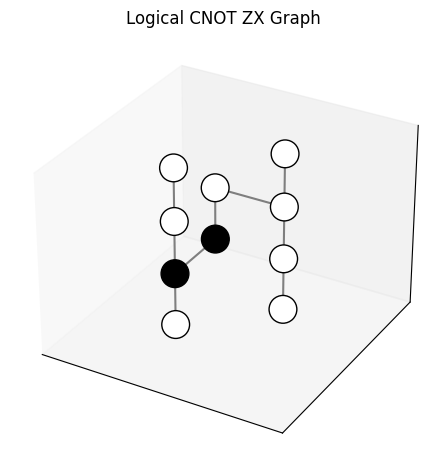

In [3]:
zx_graph.draw()

In [4]:
from pprint import pprint

block_graph = zx_graph.to_block_graph(name="Logical CNOT Block Graph")
pprint("===========Cubes==========")
pprint(block_graph.cubes)
pprint("===========Pipes==========")
pprint(block_graph.pipes)

'===========Cubes=========='
[Cube(position=Position3D(x=0, y=0, z=0), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=0, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=0), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=1), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=3), cube_type=<CubeType.ZXZ: 'zxz'>)]
'===========Pipes=========='
[Pipe(u=Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>), v=Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>), pipe_type=<PipeType.ZO

In [5]:
block_graph.to_dae_file("logical_cnot.dae", pipe_length=3.0)

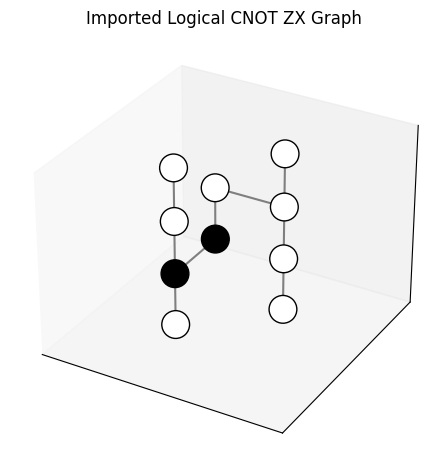

In [7]:
read_block_graph = BlockGraph.from_dae_file("logical_cnot.dae", "Import Logical CNOT Block Graph")
assert block_graph == read_block_graph
read_zx_graph = read_block_graph.to_zx_graph("Imported Logical CNOT ZX Graph")
assert read_zx_graph == zx_graph
read_zx_graph.draw()

In [8]:
read_block_graph = BlockGraph.from_dae_file("assets/clean_exportable_cnot.dae", "Import Logical CNOT Block Graph")
assert block_graph == read_block_graph
read_zx_graph = read_block_graph.to_zx_graph("Imported Logical CNOT ZX Graph")
assert read_zx_graph == zx_graph

## Hadamard Edge

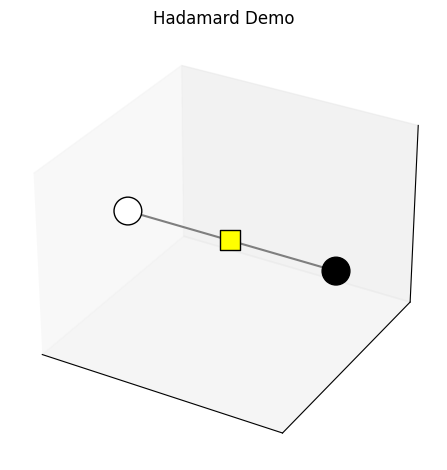

In [9]:
zx_graph = ZXGraph("Hadamard Demo")
zx_graph.add_node(Position3D(0, 0, 0), NodeType.Z)
zx_graph.add_node(Position3D(1, 0, 0), NodeType.X)
zx_graph.add_edge(Position3D(0, 0, 0), Position3D(1, 0, 0), True)
zx_graph.draw()

## Display the Collada Model

In [12]:
from tqec.sketchup.collada import display_collada_model

display_collada_model("assets/clean_exportable_cnot.dae")